In [61]:
import sys
from utils import *
import matplotlib.pyplot as plt
sys.path.append('tabular/')
from experiment_utils import run_experiment, greedy_pi_reward
from utils import ModifiedFrozenLake, q_solver
from qlearner import QLearning
from dynamic_shaping import DynamicQLearning
import numpy as np
import matplotlib.pyplot as plt
from gymnasium.wrappers import TimeLimit

map_name = '7x7zigzag'
GAMMA = 0.8

# First solve the MDP:
env = ModifiedFrozenLake(map_name=map_name, slippery=0, #min_reward=0, max_reward=1, step_penalization=0.,
                         never_done=True, cyclic_mode=True)
env = TimeLimit(env, max_episode_steps=500)

Q,V,pi,qs,phis,errs = q_solver(env, gamma=GAMMA, steps=1000000, verbose=True, tolerance=1e-7)


Converged to tolerance=1e-07 after i=72 iterations.
Done in 72 steps


In [42]:
ratios=[]
qs=[]
ps=[]
vs=[]
etas=np.linspace(-1/(1+GAMMA),(1-GAMMA)/(1+GAMMA),20)
# etas=np.linspace(-1,0.01,20)
for eta in etas:
    Qshape,Vshape,pishape,qsshape, phis,errshape = q_solver(env, gamma=GAMMA, steps=2000, verbose=True, shape_scale=eta, tolerance=1e-8)
    ratios.append(np.mean(Vshape/V))
    qs.append(np.mean(Qshape))
    ps.append(phis[-1])
    vs.append(np.mean(Vshape))

Converged to tolerance=1e-08 after i=252 iterations.
Done in 252 steps
Converged to tolerance=1e-08 after i=234 iterations.
Done in 234 steps
Converged to tolerance=1e-08 after i=219 iterations.
Done in 219 steps
Converged to tolerance=1e-08 after i=206 iterations.
Done in 206 steps
Converged to tolerance=1e-08 after i=194 iterations.
Done in 194 steps
Converged to tolerance=1e-08 after i=184 iterations.
Done in 184 steps
Converged to tolerance=1e-08 after i=174 iterations.
Done in 174 steps
Converged to tolerance=1e-08 after i=166 iterations.
Done in 166 steps
Converged to tolerance=1e-08 after i=158 iterations.
Done in 158 steps
Converged to tolerance=1e-08 after i=151 iterations.
Done in 151 steps
Converged to tolerance=1e-08 after i=144 iterations.
Done in 144 steps
Converged to tolerance=1e-08 after i=138 iterations.
Done in 138 steps
Converged to tolerance=1e-08 after i=133 iterations.
Done in 133 steps
Converged to tolerance=1e-08 after i=128 iterations.
Done in 128 steps
Conver

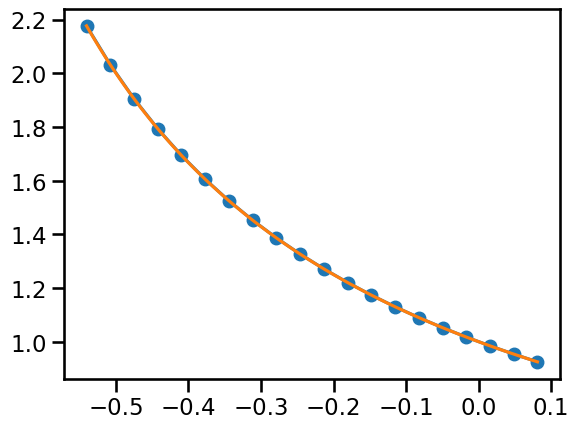

In [43]:
# etas=np.linspace(-0.51, 0.001, 15)
x_axis = np.linspace(min(etas), max(etas), 100)
plt.plot(etas, [r for r in ratios], label='Vshape/V', marker='o')
plt.plot(x_axis, 1/(x_axis+1))
# plt.plot(etas, 1/(etas-1)**12)

In [44]:
min(qsshape)

-5.2251278484565065

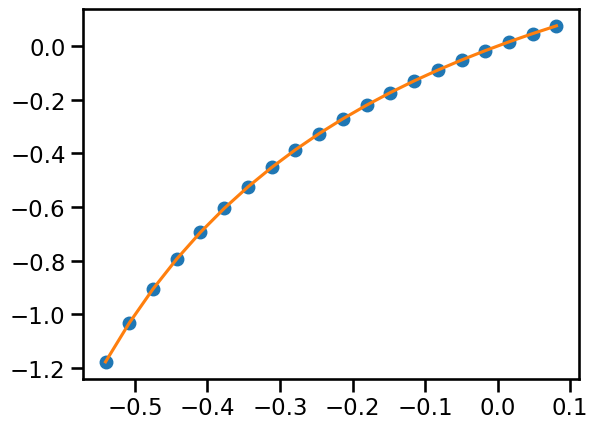

In [45]:
plt.plot(etas, ps/V.mean(), 'o')
# plt.plot(etas, etas * V.mean()/(1+etas))
plt.plot(etas, [e/(1+e) for e in etas])
# plt.yscale('log')

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


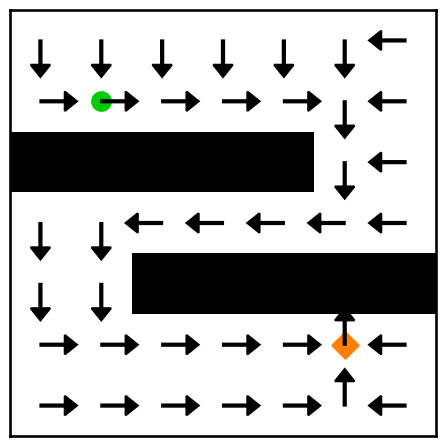

<Figure size 640x480 with 0 Axes>

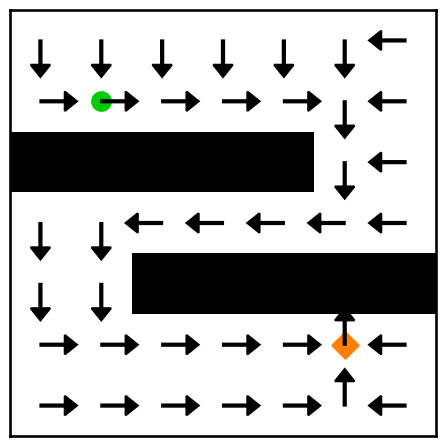

In [62]:
from visualizations import plot_dist
plot_dist(env.desc, pi, filename='zigzag_policy_shape.png')

In [47]:
(-GAMMA)/(1+GAMMA)
Qshape,Vshape,pishape,qsshape,phisshape, errshape = q_solver(env, gamma=GAMMA, steps=2000, verbose=True, shape_scale=-0.0047)

Converged to tolerance=1e-06 after i=84 iterations.
Done in 84 steps


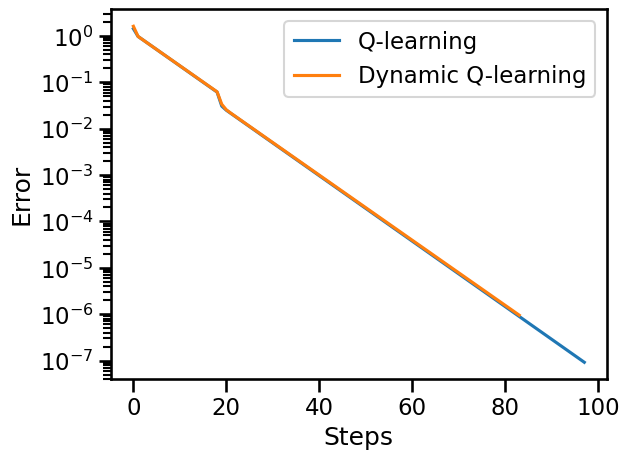

In [48]:
plt.plot(errs, label='Q-learning')
plt.plot(errshape, label='Dynamic Q-learning')
plt.yscale('log')

plt.ylabel('Error')
plt.xlabel('Steps')
# plt.xlim(0,10)
# plt.ylim(5e-1,2)
plt.legend()

In [82]:
etas = np.linspace(-1.5*GAMMA/(1+GAMMA), 60*(1-GAMMA)/(1+GAMMA), 300)
etas = np.linspace(-0.6, 0.6, 300)
errors = []
steps = []
max_steps = 3000
for eta in etas:
    FINAL_ERROR = []
    NUM_STEPS = []
    for run in range(20):
        Qshape,Vshape,pishape,qsshape,phisshape, errshape = q_solver(env, gamma=GAMMA, steps=max_steps, verbose=True, shape_scale=eta, tolerance=1e-8)
        FINAL_ERROR.append(errshape[-1])
        NUM_STEPS.append(len(errshape))
    errors.append([np.mean(FINAL_ERROR), np.std(FINAL_ERROR)])
    steps.append([np.mean(NUM_STEPS), np.std(NUM_STEPS)])
    # flush and print the iter:
    print(eta, flush=True)


Converged to tolerance=1e-08 after i=215 iterations.
Done in 215 steps
Converged to tolerance=1e-08 after i=215 iterations.
Done in 215 steps
Converged to tolerance=1e-08 after i=216 iterations.
Done in 216 steps
Converged to tolerance=1e-08 after i=216 iterations.
Done in 216 steps
Converged to tolerance=1e-08 after i=215 iterations.
Done in 215 steps
Converged to tolerance=1e-08 after i=216 iterations.
Done in 216 steps
Converged to tolerance=1e-08 after i=216 iterations.
Done in 216 steps
Converged to tolerance=1e-08 after i=215 iterations.
Done in 215 steps
Converged to tolerance=1e-08 after i=216 iterations.
Done in 216 steps
Converged to tolerance=1e-08 after i=216 iterations.
Done in 216 steps
Converged to tolerance=1e-08 after i=216 iterations.
Done in 216 steps
Converged to tolerance=1e-08 after i=216 iterations.
Done in 216 steps
Converged to tolerance=1e-08 after i=215 iterations.
Done in 215 steps
Converged to tolerance=1e-08 after i=216 iterations.
Done in 216 steps
Conver

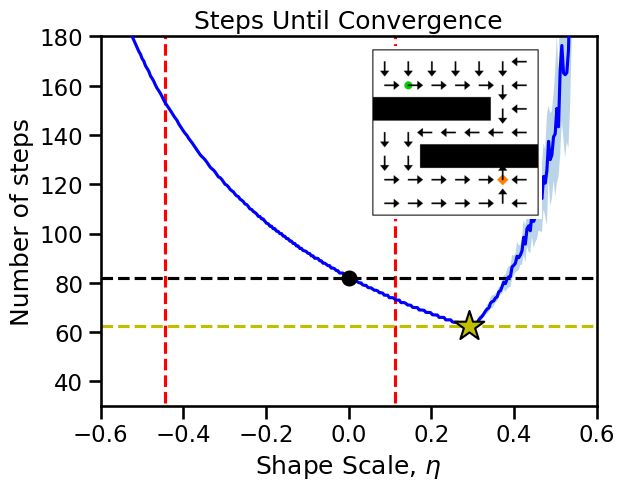

In [85]:
import seaborn as sns
sns.set_context('talk')
# unpack into steps and stdsteps:
errors = np.array(errors)
steps = np.array(steps)
avg_steps, stdsteps = steps[:,0], steps[:,1]
plt.plot(etas, avg_steps, color='b', zorder=5)
plt.fill_between(etas, avg_steps-stdsteps, avg_steps+stdsteps, alpha=0.3)
plt.vlines(-GAMMA/(1+GAMMA), 0.5*min(avg_steps), 10*max(avg_steps), color='r', linestyle='--')
plt.vlines((1-GAMMA)/(1+GAMMA), 0.5*min(avg_steps), 10*max(avg_steps), color='r', linestyle='--')
second_line=r'(within $10^{-6}$ error in sup-norm)'
# plt.title(f'Number of steps to convergence \n {second_line}')
plt.title('Steps Until Convergence')
plt.xlabel(r'Shape Scale, $\eta$')
plt.ylabel('Number of steps')
plt.xlim(-0.6,0.6)
plt.ylim(30,180)
# plt.ylim(0.8*min(avg_steps), 0.98*max_steps)
# draw star with black outline at optimal eta (Smallest steps):
opt_x = etas[np.argmin(avg_steps)]
opt_y = min(avg_steps)
# put horizontal line at best eta:
plt.hlines(min(avg_steps), min(etas), max(etas), color='y', linestyle='--')
# and at baseline (closest to zero eta)
baseline_eta_idx = np.argmin(np.abs(etas))
plt.hlines(avg_steps[baseline_eta_idx], min(etas), max(etas), color='k', linestyle='--')
# draw the same symbol in black:
# plt.yscale('log')
# embed the zigzag policy png:
plt.scatter(opt_x, opt_y, color='y', marker='*', s=500, edgecolors='k', zorder=10)

plt.scatter(etas[baseline_eta_idx], avg_steps[baseline_eta_idx], color='k', marker='o', s=100, zorder=10)
from PIL import Image
img = Image.open('zigzag_policy_shape.png')
# make small in top center:
# plt.axes([0.35, 0.59, 0.28, 0.28], frameon=False, xticks=[], yticks=[])
plt.axes([0.5, 0.5, 0.36, 0.36], frameon=False, xticks=[], yticks=[])

plt.imshow(img)
# black dot on baseline:


In [70]:
avg_steps[baseline_eta_idx]

62.0

In [51]:
(avg_steps[baseline_eta_idx] - opt_y)/avg_steps[baseline_eta_idx]

0.2289156626506024

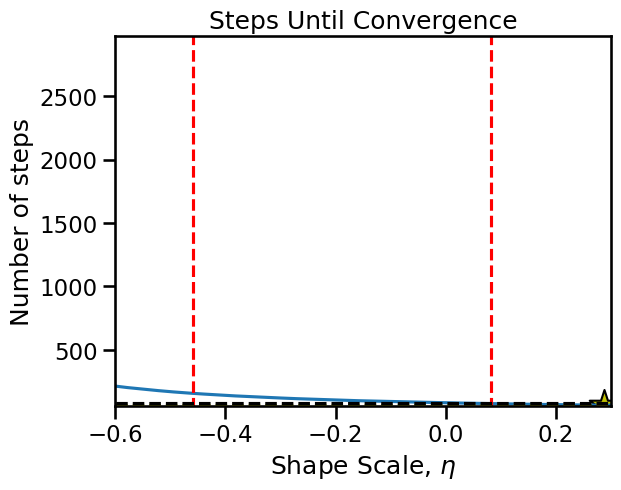

In [52]:
import seaborn as sns
sns.set_context('talk')
# unpack into steps and stdsteps:
errors = np.array(errors)
steps = np.array(steps)
avg_steps, stdsteps = steps[:,0], steps[:,1]
plt.plot(etas, avg_steps)
plt.fill_between(etas, avg_steps-stdsteps, avg_steps+stdsteps, alpha=0.3)
plt.vlines(-GAMMA/(1+GAMMA), 0.5*min(avg_steps), max(avg_steps), color='r', linestyle='--')
plt.vlines((1-GAMMA)/(1+GAMMA), 0.5*min(avg_steps), max(avg_steps), color='r', linestyle='--', label='Theoretical Bounds')
second_line=r'(within $10^{-6}$ error in sup-norm)'
# plt.title(f'Number of steps to convergence \n {second_line}')
plt.title('Steps Until Convergence')
plt.xlabel(r'Shape Scale, $\eta$')
plt.ylabel('Number of steps')
plt.xlim(-0.6,0.3)
plt.ylim(0.9*min(avg_steps), 0.99*max_steps)
# draw star with black outline at optimal eta (Smallest steps):
opt_x = etas[np.argmin(avg_steps)]
opt_y = min(avg_steps)
plt.scatter(opt_x, opt_y, color='y', marker='*', s=500, edgecolors='k')
# put horizontal line at best eta:
plt.hlines(min(avg_steps), min(etas), max(etas), color='y', linestyle='--', label='Optimal')
# and at baseline (closest to zero eta)
baseline_eta_idx = np.argmin(np.abs(etas))
plt.hlines(avg_steps[baseline_eta_idx], min(etas), max(etas), color='k', linestyle='--', label='Baseline')
# draw the same symbol in black:
# plt.yscale('log')
# Add red arrows pointing to dashed lines:


(1e-07, 0.1)

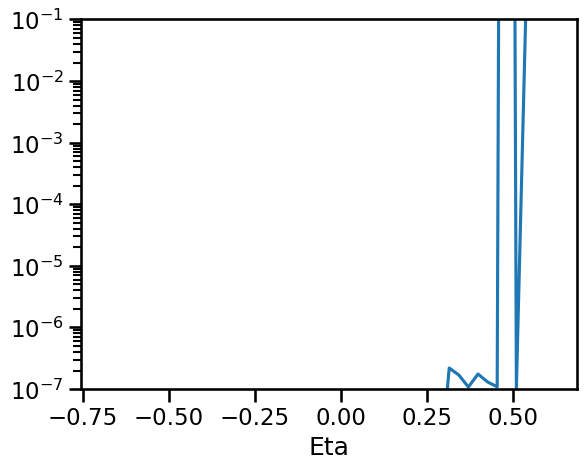

In [53]:
plt.plot(etas, [e[-1] for e in errors])
plt.yscale('log')
plt.xlabel('Eta')
plt.ylim(1e-7,1e-1)

In [54]:
errors

array([[9.76615731e-007, 8.33584886e-009],
       [9.64277467e-007, 6.06845607e-009],
       [9.77215609e-007, 8.81119116e-009],
       [9.84606690e-007, 4.76440607e-009],
       [9.77692060e-007, 2.36530268e-008],
       [9.49849669e-007, 3.62151436e-009],
       [9.64618305e-007, 2.74128216e-008],
       [9.92969425e-007, 4.81550340e-009],
       [9.81227834e-007, 9.84520946e-009],
       [9.53584832e-007, 1.38176604e-008],
       [9.30305376e-007, 8.36093111e-009],
       [9.59771497e-007, 1.89854857e-008],
       [9.35674741e-007, 6.96908439e-009],
       [9.76570686e-007, 1.07045468e-008],
       [9.60330450e-007, 7.20478492e-009],
       [9.76339236e-007, 8.32303143e-009],
       [9.31395802e-007, 1.01678797e-008],
       [9.28020665e-007, 3.40281195e-008],
       [9.18924209e-007, 1.34224085e-008],
       [9.77623071e-007, 7.03184730e-009],
       [9.33647699e-007, 1.10562423e-008],
       [9.12966381e-007, 1.10498056e-008],
       [9.09941429e-007, 1.28706010e-008],
       [9.2